In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.optimizers import Adamax
from sklearn.metrics import confusion_matrix




# Reading Data

In [17]:
beforeWrangling = pd.read_csv("/content/drive/My Drive/GP/framingham.csv")

In [18]:
heart_data = pd.read_csv('/content/drive/My Drive/GP/Heart disease prediction(second) /imputed_data.csv')

In [ ]:
heart_data.head()

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


# Categorical Encoding

In [19]:
heart_data.columns

Index(['Unnamed: 0', 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [20]:
heart_data=heart_data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

In [21]:
len(heart_data.columns)

16

# Splitting Data

In [22]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(strategy='median')
imputed_data = pd.DataFrame(my_imputer.fit_transform(beforeWrangling))

# Imputation removed column names; put them back
imputed_data.columns = beforeWrangling.columns

In [23]:
from sklearn.preprocessing import MinMaxScaler

target_column = ['TenYearCHD']
predictors = list(set(list(beforeWrangling.columns))-set(target_column))
bX = beforeWrangling[predictors].values
by = beforeWrangling[target_column].values
scalar = MinMaxScaler()
scalar.fit(bX)
bX = scalar.transform(bX)
bX_train, bX_test, by_train, by_test = train_test_split(bX, by, test_size=0.2, random_state=1)


After Cleaning

In [25]:
from sklearn.preprocessing import MinMaxScaler

target_column = ['TenYearCHD']
predictors = list(set(list(heart_data.columns))-set(target_column))
X = heart_data[predictors].values
y = heart_data[target_column].values
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Keras Model

In [30]:
# define the keras model
basemodel = Sequential()
basemodel.add(Dense(15, input_dim=15, activation='relu'))
basemodel.add(Dense(15, activation='relu'))
basemodel.add(Dense(15, activation='relu'))
basemodel.add(Dense(1, activation='sigmoid'))
# compile the keras model
basemodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
basemodel.fit(bX_train, by_train, epochs=300, validation_split=0.25, batch_size=30)

Epoch 1/300
85/85 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8399 - val_loss: nan - val_accuracy: 0.8443
Epoch 2/300
85/85 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8438 - val_loss: nan - val_accuracy: 0.8443
Epoch 3/300
85/85 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8438 - val_loss: nan - val_accuracy: 0.8443
Epoch 4/300
85/85 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8438 - val_loss: nan - val_accuracy: 0.8443
Epoch 5/300
85/85 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8438 - val_loss: nan - val_accuracy: 0.8443
Epoch 6/300
85/85 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8438 - val_loss: nan - val_accuracy: 0.8443
Epoch 7/300
85/85 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8438 - val_loss: nan - val_accuracy: 0.8443
Epoch 8/300
85/85 [==============================] - 0s

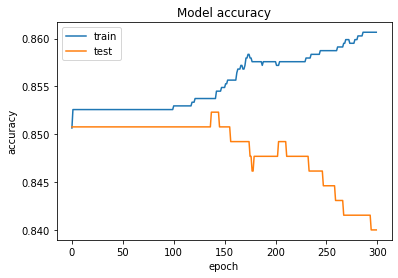

Train: 0.844, Test: 0.864


In [34]:
#plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# evaluate the model
_, train_acc = basemodel.evaluate(bX_train, by_train, verbose=0)
_, test_acc = basemodel.evaluate(bX_test, by_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

after cleaning

In [32]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=15, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    # compile model
    adam = Adam(lr=0.0001)
    model.compile(loss="binary_crossentropy", optimizer=adam,metrics=['accuracy'])
    return model
model = create_model()
print(model.summary())
history=model.fit(X_train, y_train, validation_split=0.2,epochs=300, shuffle = False)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
82/82 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.8507 - val_loss: 0.5634 - val_accuracy: 0.8508
Epoch 2/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5508 - accuracy: 0.8526 - val_loss: 0.5382 - val_accuracy: 0.8508
Epoch 3/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5276 - accuracy: 0.8526 

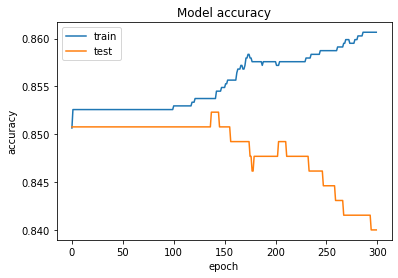

Train: 0.857, Test: 0.852


In [33]:
#plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Hahaha

In [35]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=80, batch_size=10)

Epoch 1/80
325/325 [==============================] - 0s 982us/step - loss: 0.4485 - accuracy: 0.8522
Epoch 2/80
325/325 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8522
Epoch 3/80
325/325 [==============================] - 0s 994us/step - loss: 0.4077 - accuracy: 0.8522
Epoch 4/80
325/325 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8522
Epoch 5/80
325/325 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8525
Epoch 6/80
325/325 [==============================] - 0s 928us/step - loss: 0.3934 - accuracy: 0.8528
Epoch 7/80
325/325 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8541
Epoch 8/80
325/325 [==============================] - 0s 1ms/step - loss: 0.3882 - accuracy: 0.8553
Epoch 9/80
325/325 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8553
Epoch 10/80
325/325 [==============================] - 0s 960us/step - loss: 0.3838 - accuracy

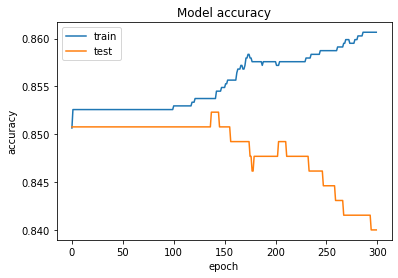

Train: 0.861, Test: 0.851


In [36]:
#plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

#Optimization

In [37]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=15, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855950 using {'optimizer': 'RMSprop'}
0.854226 (0.009674) with: {'optimizer': 'SGD'}
0.855950 (0.009285) with: {'optimizer': 'RMSprop'}
0.851764 (0.007753) with: {'optimizer': 'Adagrad'}
0.851025 (0.007453) with: {'optimizer': 'Adadelta'}
0.854225 (0.010925) with: {'optimizer': 'Adam'}
0.854718 (0.008735) with: {'optimizer': 'Adamax'}
0.853980 (0.009307) with: {'optimizer': 'Nadam'}


# Learning Rate and Momentum

In [38]:
# Use scikit-learn to grid search the learning rate and momentum
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD
from keras.optimizers import Adamax

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=15, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	#optimizer = SGD(lr=learn_rate, momentum=momentum)
	optimizer = Adamax(learning_rate=learn_rate, beta_1 = momentum)

	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.856689 using {'learn_rate': 0.001, 'momentum': 0.2}
0.854472 (0.009045) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.856689 (0.009727) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.856442 (0.006669) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.856442 (0.008544) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.855457 (0.006667) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.855950 (0.009426) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.851517 (0.007186) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.853982 (0.013216) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.851763 (0.010548) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.843146 (0.013086) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.849301 (0.011680) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.849301 (0.011262) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.852010 (0.009276) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.848072 (0.013399) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.848808 (0.010365) with: {'learn_rate':

# Network Weight Initialization

In [39]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=15, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 	#model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.856935 using {'init_mode': 'uniform'}
0.856935 (0.009107) with: {'init_mode': 'uniform'}
0.853979 (0.011214) with: {'init_mode': 'lecun_uniform'}
0.852502 (0.008885) with: {'init_mode': 'normal'}
0.851764 (0.007753) with: {'init_mode': 'zero'}
0.853734 (0.008229) with: {'init_mode': 'glorot_normal'}
0.852994 (0.008957) with: {'init_mode': 'glorot_uniform'}
0.851024 (0.007700) with: {'init_mode': 'he_normal'}
0.853486 (0.008682) with: {'init_mode': 'he_uniform'}


# Dropout Regularization

In [40]:
# Use scikit-learn to grid search the dropout rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=15, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855458 using {'dropout_rate': 0.5, 'weight_constraint': 3}
0.854965 (0.009209) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.854226 (0.009246) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.854226 (0.009290) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.853733 (0.007948) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.854472 (0.009277) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.854472 (0.009017) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.855211 (0.009155) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.852749 (0.009181) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.853734 (0.010054) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.854472 (0.008170) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.853979 (0.007800) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.854226 (0.009788) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.854719 (0.008216) with: {'dropout_rate': 0.2, 'weight_constraint': 

# Number of Neurons in the Hidden Layer

In [41]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=15, kernel_initializer='lecun_uniform', activation='linear', kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [10,12, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.856196 using {'neurons': 10}
0.856196 (0.009004) with: {'neurons': 10}
0.855457 (0.008844) with: {'neurons': 12}
0.854226 (0.009317) with: {'neurons': 15}
0.853980 (0.009378) with: {'neurons': 20}
0.854964 (0.007948) with: {'neurons': 25}
0.854473 (0.009134) with: {'neurons': 30}


In [42]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=15, kernel_initializer='lecun_uniform', activation='linear', kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [5,6,8,9,10,12]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855704 using {'neurons': 5}
0.855704 (0.009894) with: {'neurons': 5}
0.854227 (0.009268) with: {'neurons': 6}
0.854719 (0.007688) with: {'neurons': 8}
0.855211 (0.007840) with: {'neurons': 9}
0.853241 (0.010265) with: {'neurons': 10}
0.854472 (0.008089) with: {'neurons': 12}


#Final Model

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=15,kernel_initializer='lecun_uniform', activation='relu'))
    model.add(Dense(10,kernel_initializer='lecun_uniform', activation='relu'))
    model.add(Dense(1,kernel_initializer='lecun_uniform', activation='sigmoid'))
    # compile model
    #sgd = SGD(lr=0.001, momentum = 0)
    optimizer = Adamax(learning_rate=0.001, beta_1 = 0)

    model.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=['accuracy'])
    return model
model = create_model()
print(model.summary())
history=model.fit(X_train, y_train, validation_split=0.25,epochs=50, shuffle = False)


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 11        
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
77/77 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5464 - val_loss: 0.5818 - val_accuracy: 0.8448
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 0.5329 - accuracy: 0.8530 - val_loss: 0.4995 - val_accuracy: 0.8473
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.8539 - val_loss: 0.4716 - val_accuracy: 0.8473
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0

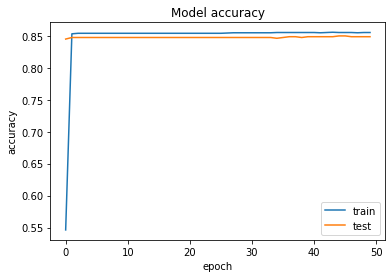

Train: 0.853, Test: 0.852


In [ ]:
#plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Evaluation

In [ ]:
# make probability predictions with the model
predictions =model.predict(X_test)
# round predictions 
rounded = [round(x[0]) for x in predictions]

In [ ]:
cm = confusion_matrix(y_test ,rounded)
f, ax = pyplot.subplots(figsize=(12,6))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
pyplot.xlabel("Predicted")
pyplot.ylabel("Grand Truth")
pyplot.show()

print('Report \n\n' , classification_report(y_test, rounded)

SyntaxError: ignored